<a href="https://colab.research.google.com/github/GeraldL19/Final-Year-Project-2024/blob/main/Data_Exploration_and_Preparation_24_01_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
!pip install -U ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=9f2b4651d99e6a6c355d382f7f5404738260c7d7bf90a184494da418b97a231a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting unin

In [2]:
# Installed packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

# Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Profiling package
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file

# Imputer Selection
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from numpy import mean, std

In [3]:
#Import dataset from GoogleDrive
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/credit_risk_dataset.csv")
df

person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0             PERSONAL          D      35000          16.02            1   
1            EDUCATION          B       1000          11.14            0   
2              MEDICAL          C       5500          12.87            1   
3              MEDICAL          C      35000          15.23            1   
4              MEDICAL          C      35000          14.27            1   
...                ...        ...        ...            ...          ...   
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
0                               3  
1                               2  
2                               3  
3                               2  
4                               4  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[32581 rows x 12 columns]

# **Exploratory Data Analysis**

# Basic information

In [4]:
df.shape

(32581, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Data types are as expected.

In [6]:
df.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [7]:
# Quantitative variables:
num_cols = ["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate",
            "loan_percent_income", "cb_person_cred_hist_length"]

# Set display options to suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [8]:
df.describe()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
count   32581.000      32581.000          31686.000  32581.000      29465.000   
mean       27.735      66074.848              4.790   9589.371         11.012   
std         6.348      61983.119              4.143   6322.087          3.240   
min        20.000       4000.000              0.000    500.000          5.420   
25%        23.000      38500.000              2.000   5000.000          7.900   
50%        26.000      55000.000              4.000   8000.000         10.990   
75%        30.000      79200.000              7.000  12200.000         13.470   
max       144.000    6000000.000            123.000  35000.000         23.220   

       loan_status  loan_percent_income  cb_person_cred_hist_length  
count    32581.000            32581.000                   32581.000  
mean         0.218                0.170                       5.804  
std          0.413                0.107                       4.055  
min          0.000                0.000                       2.000  
25%          0.000                0.090                       3.000  
50%          0.000                0.150                       4.000  
75%          0.000                0.230                       8.000  
max          1.000                0.830                      30.000

In [9]:
df.describe(include='object')

person_home_ownership loan_intent loan_grade cb_person_default_on_file
count                  32581       32581      32581                     32581
unique                     4           6          7                         2
top                     RENT   EDUCATION          A                         N
freq                   16446        6453      10777                     26836

*   The dataset has a total of 12 variables and 32581 observations.<br>
*   7 Numeric variables of variable range, 4 Categorical and 1 Boolean (loan_status).<br>
*   The range of each variable is very different, this will cause a problem with the algorithms therefore the data will have to scaled before modeling.


# ydata Profiling

We are using ydata profiling in order to get an overview of the data quickly and efficiently.

Pandas Profiling is a Python library that automates the process of exploratory data analysis (EDA) for a given DataFrame. It generates a comprehensive and interactive HTML report, offering insights into the dataset's characteristics, including data types, distributions, missing values, and potential issues. The library's visualizations, such as histograms and correlation matrices, aid in quickly understanding data patterns. Pandas Profiling is a time-efficient tool for data cleaning and preprocessing, providing a holistic overview of the dataset's structure and content.'

In [10]:
# Generate the Profiling Report
profile = ProfileReport(df, title="Credit Risk Dataset", html={"style": {"full_width": True}}, sort=None)

In [11]:
# The HTML report in an iframe
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

*   We have a total of 12 variables and 32581 observations.<br>
*   7 Numeric variables, 4 Categorical and 1 Boolean.<br>
*   4011 missing cells in 'person_emp_length' (895) and 'loan_int_rate' (3116)
*   165 duplicates rows
*   Some correlation

# Target Variable Analysis

Our target variable is the variable 'loan_status'. This variables indicate if an applicant has defaulted (1) or paid-off (0) his loan.

Text(0, 0.5, 'Count')

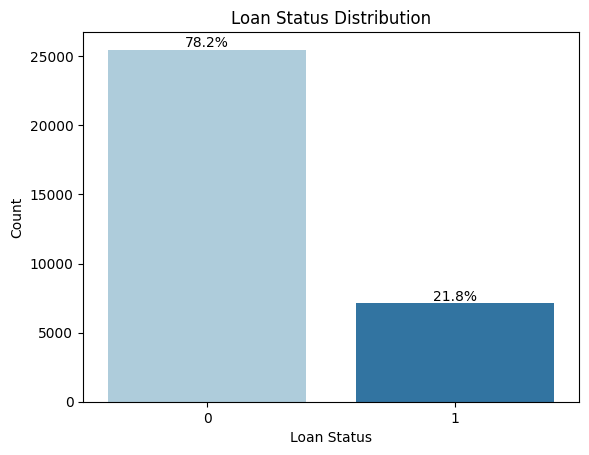

In [12]:
# Count the occurrences of each value in the 'loan_status' column
value_counts = df['loan_status'].value_counts()

# Set the Seaborn color palette
sns.set_palette('Paired')

# Create a bar plot
sns.countplot(x='loan_status', data=df)

# Add percentage labels on top of the bars
total_data_points = len(df['loan_status'])
for index, value in enumerate(value_counts):
    percentage = (value / total_data_points) * 100
    plt.text(index, value + 2, f'{percentage:.1f}%', ha='center', va='bottom')

# Labels
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')

*   **The target variable is displaying some imbalance with only 21.6% of cases being 'default'**.<br>
*   This can cause some biases with the algorithms, therefore we need to pay attention to specific accuracy metrics during the testing and validation face to ensure there is no biases towards the majority class.<br>
*   If this imbalance is affecting the performance of our algorithms  there might be a need to use techniques such as SMOTE resampling to help mitigate its effect.



# Categorical Variables Analysis

In [13]:
# Function to create stcked bar chart of variable distribution by 'loan_status'
def plot_stacked_bar(data, category_col, status_col):
    # Create a DataFrame for the stacked bar chart
    df_crosstab = pd.crosstab(df[category_col], df[status_col], normalize='index') * 100

    # Plot the stacked bar chart with seaborn
    plt.figure(figsize=(8, 6))
    ax = df_crosstab.plot(kind='bar', stacked=True, rot=0)

    # Change legend labels
    ax.legend(['Paid off', 'Default'], title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Add percentage labels
    for i, (index, row) in enumerate(df_crosstab.iterrows()):
        total_percentage = row.sum()
        height = 0
        for j, value in enumerate(row):
            if value > 2:  # Threshold to avoid overlap if % too small
                ax.text(i, height + value / 2, f'{value:.1f}%', ha='center', va='center', color='black', fontsize=8)
            height += value

    # Rotate x-axis labels by 45 degrees
    plt.xticks(rotation=45)

    # Set plot title and labels
    plt.title(f'{category_col} Distribution by {status_col}')
    plt.xlabel(category_col)
    plt.ylabel('Percentage')

    # Show the plot
    plt.show()

**Home Ownership**

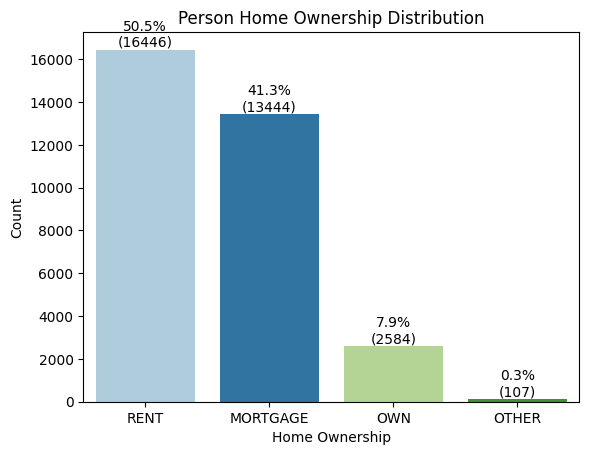

In [14]:
# Calculate value counts and sort in descending order
home_counts = df['person_home_ownership'].value_counts().sort_values(ascending=False)

# Create a bar plot
sns.countplot(x='person_home_ownership', data=df, order=home_counts.index)

# Add percentage labels on top of the bars
total_data_points = len(df['person_home_ownership'])
for index, value in enumerate(home_counts):
    percentage = (value / total_data_points) * 100
    plt.text(index, value + 2, f'{percentage:.1f}%\n({value})', ha='center', va='bottom')

# Set plot title and labels
plt.title('Person Home Ownership Distribution')
plt.xlabel('Home Ownership')
plt.ylabel('Count')

# Show the plot
plt.show()

<Figure size 800x600 with 0 Axes>

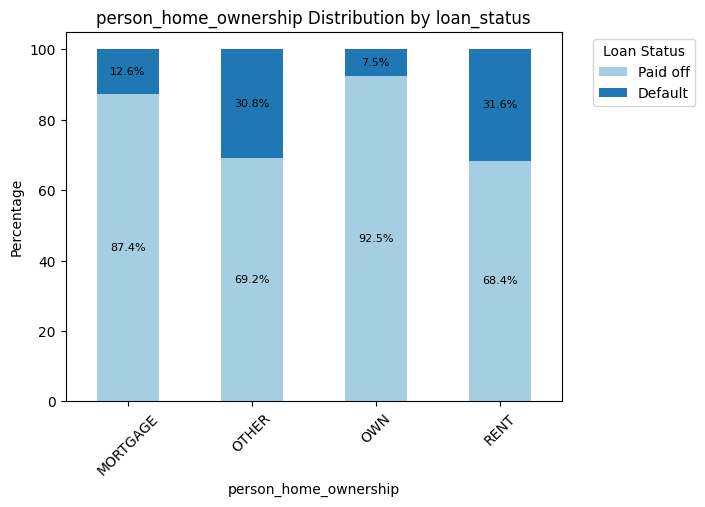

In [15]:
plot_stacked_bar(df, 'person_home_ownership', 'loan_status')

*   We can observe that a majority or applicant either has a mortgage (41.3%) or rent (50.8%) their home, making up 91.2% of the whole datasets. Meaning most applicant do not own their home.<br>
*   'Other' has a very small number of cases with only 106 cases (0.3%)<br>
*   There is a higher number of loan where the applicant is either renting or 'other' are defaulting (31.1%) compared to applicants with a mortgage (12.5%).<br>
*   Home owners are highly likely to pay back their loan (93.1%).






**Loan Grade**

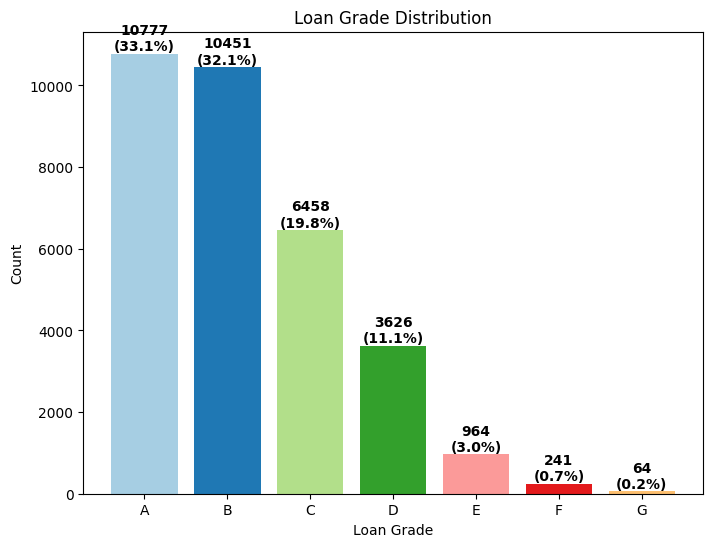

In [16]:
# Calculate value counts
grade_counts = df['loan_grade'].value_counts()
# Calculate the total
grade_total = grade_counts.sum()
# Set the figure size
plt.figure(figsize=(8, 6))
# Create a bar chart using Matplotlib
colors = plt.cm.Paired(range(len(grade_counts)))

plt.bar(grade_counts.index, grade_counts, color=colors)
# Annotate with total counts
for i, (count, label) in enumerate(zip(grade_counts, grade_counts.index)):
    plt.text(i, count + 0.1, f'{count}\n({count/grade_total:.1%})', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Set plot title and labels
plt.title('Loan Grade Distribution')
plt.xlabel('Loan Grade')
plt.ylabel('Count')

# Show the plot
plt.show()

<Figure size 800x600 with 0 Axes>

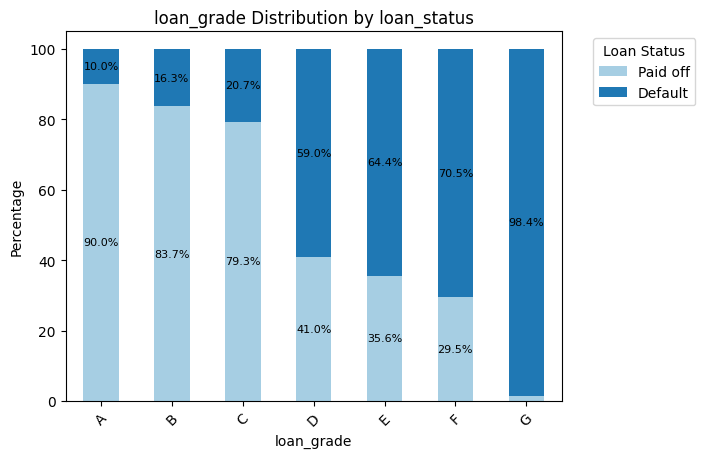

In [17]:
plot_stacked_bar(df, 'loan_grade', 'loan_status')

*   Loan of grade A and B are the most frequent one, representing 65.2% of the dataset. On the other hand loan of grade E,F and G together represent less than 4% of cases.
*   For Loan of grade A, B, and C the vast majority of the loans have been paid off >=79%, it is the opposite for loans of grade D, E, F and G <=42%.



**Loan Intent**

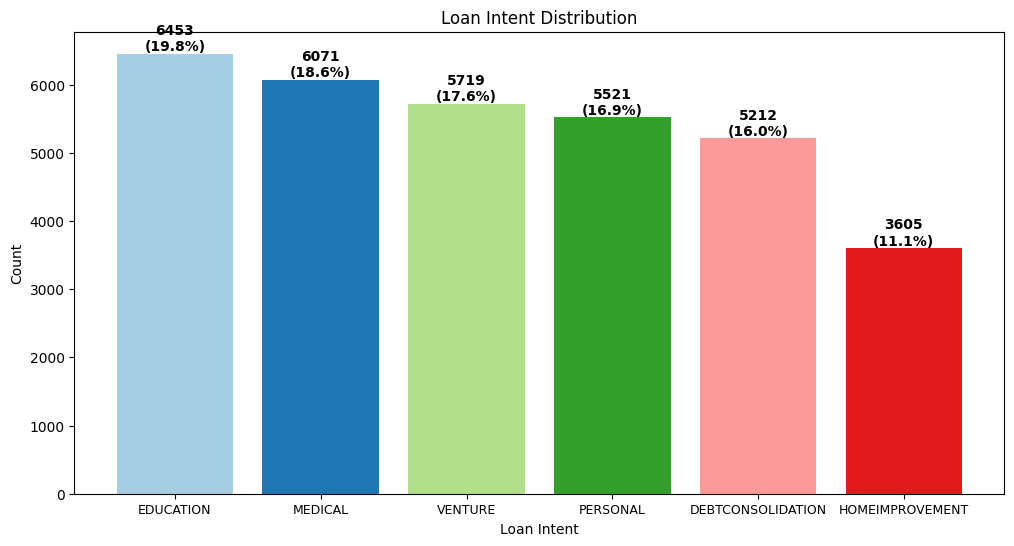

In [18]:
# Calculate value counts
intent_counts = df['loan_intent'].value_counts()
# Calculate the total
intent_total = intent_counts.sum()
# Set the figure size
plt.figure(figsize=(12, 6))
# Create a bar chart using Matplotlib
colors = plt.cm.Paired(range(len(intent_counts)))

plt.bar(intent_counts.index, intent_counts, color=colors)
# Annotate with total counts
for i, (count, label) in enumerate(zip(intent_counts, intent_counts.index)):
    plt.text(i, count + 0.1, f'{count}\n({count/intent_total:.1%})', ha='center', va='bottom', fontsize=10, fontweight='bold')
# Set plot title and labels
plt.title('Loan Intent Distribution')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.xticks(fontsize=9)

# Show the plot
plt.show()

<Figure size 800x600 with 0 Axes>

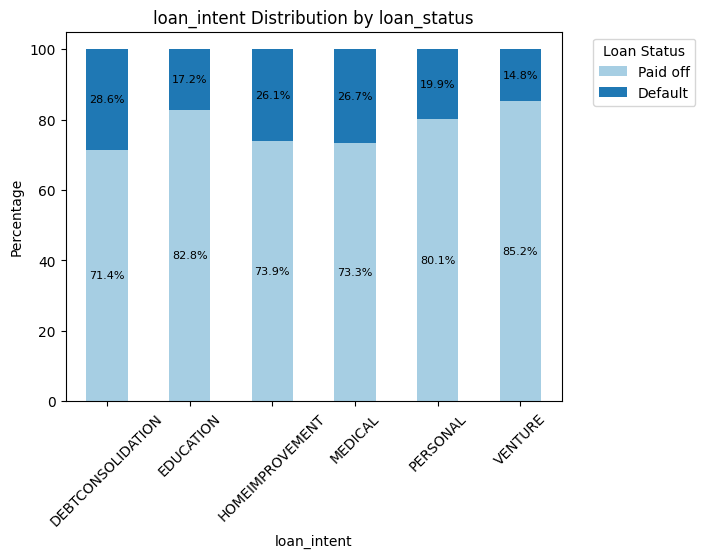

In [19]:
plot_stacked_bar(df, 'loan_intent', 'loan_status')

*   Each class has between 5000 and 6500 cases except Home Improvement, which has a slightly lower total number.
*   The ratio of Paid-off to Default is roughly the same for each loan intent, between 15% and 30% of cases having defaulted.  



**Person previously defaulted**

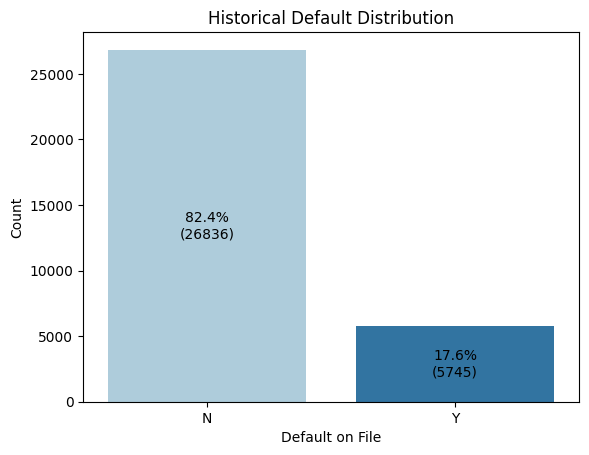

In [20]:
# Calculate value counts
default_counts = df['cb_person_default_on_file'].value_counts()
# Sort the value counts in descending order
default_counts = default_counts.sort_values(ascending=False)

# Create a bar plot
ax = sns.barplot(x=default_counts.index, y=default_counts.values)

# Add percentage and count labels inside the bars
total_data_points = len(df['cb_person_default_on_file'])
for index, value in enumerate(default_counts):
    percentage = (value / total_data_points) * 100
    ax.text(index, value / 2, f'{percentage:.1f}%\n({value})', ha='center', va='center', color='black', fontsize=10)

# Set plot title and labels
plt.title('Historical Default Distribution')
plt.xlabel('Default on File')
plt.ylabel('Count')

# Show the plot
plt.show()

<Figure size 800x600 with 0 Axes>

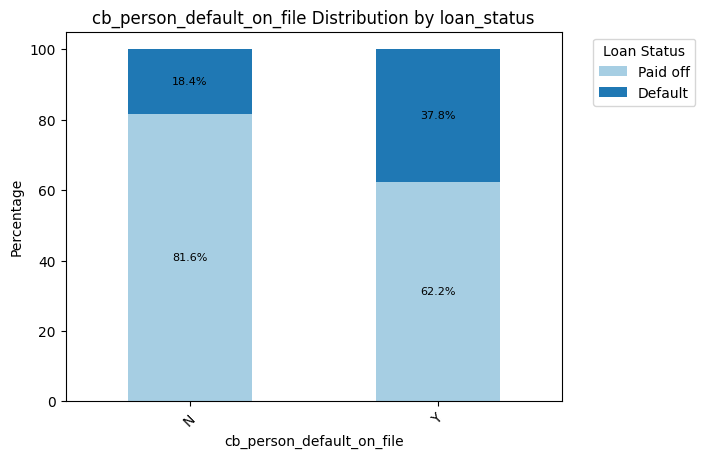

In [21]:
plot_stacked_bar(df, 'cb_person_default_on_file', 'loan_status')

*   We can see that 82.4% of all loan applicants never had previously defaulted.*   From the applicants that never defaulted previously only 18.4% Defaulted on their loan.
*   If an applicant had previously defaulted on a loan he is more like to default again, with 37.9% of applicant with previous default, defaulting on their current loan.

# Multivariate distribution

**Person Age across Loan Intent**

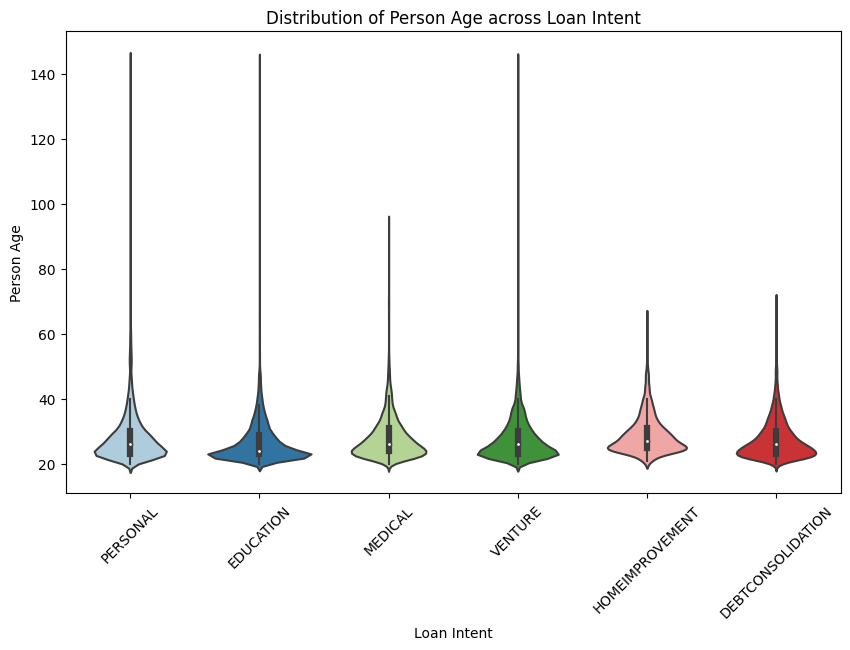

In [22]:
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='loan_intent', y='person_age', data=df, palette='Paired')

# Set plot title and labels
plt.title('Distribution of Person Age across Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Person Age')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)
# Show the plot
plt.show()

*   For obvious reason the age for loan intended for Education is concentrated between 20 and 25 years old.
*   Home Improvement seems to show a longuer body indicated that the age range is wider than other intent. Similar to Medical.

# Pair plot

In order to improve visibility, only a sample of 1000 were used to construct the pair plot.

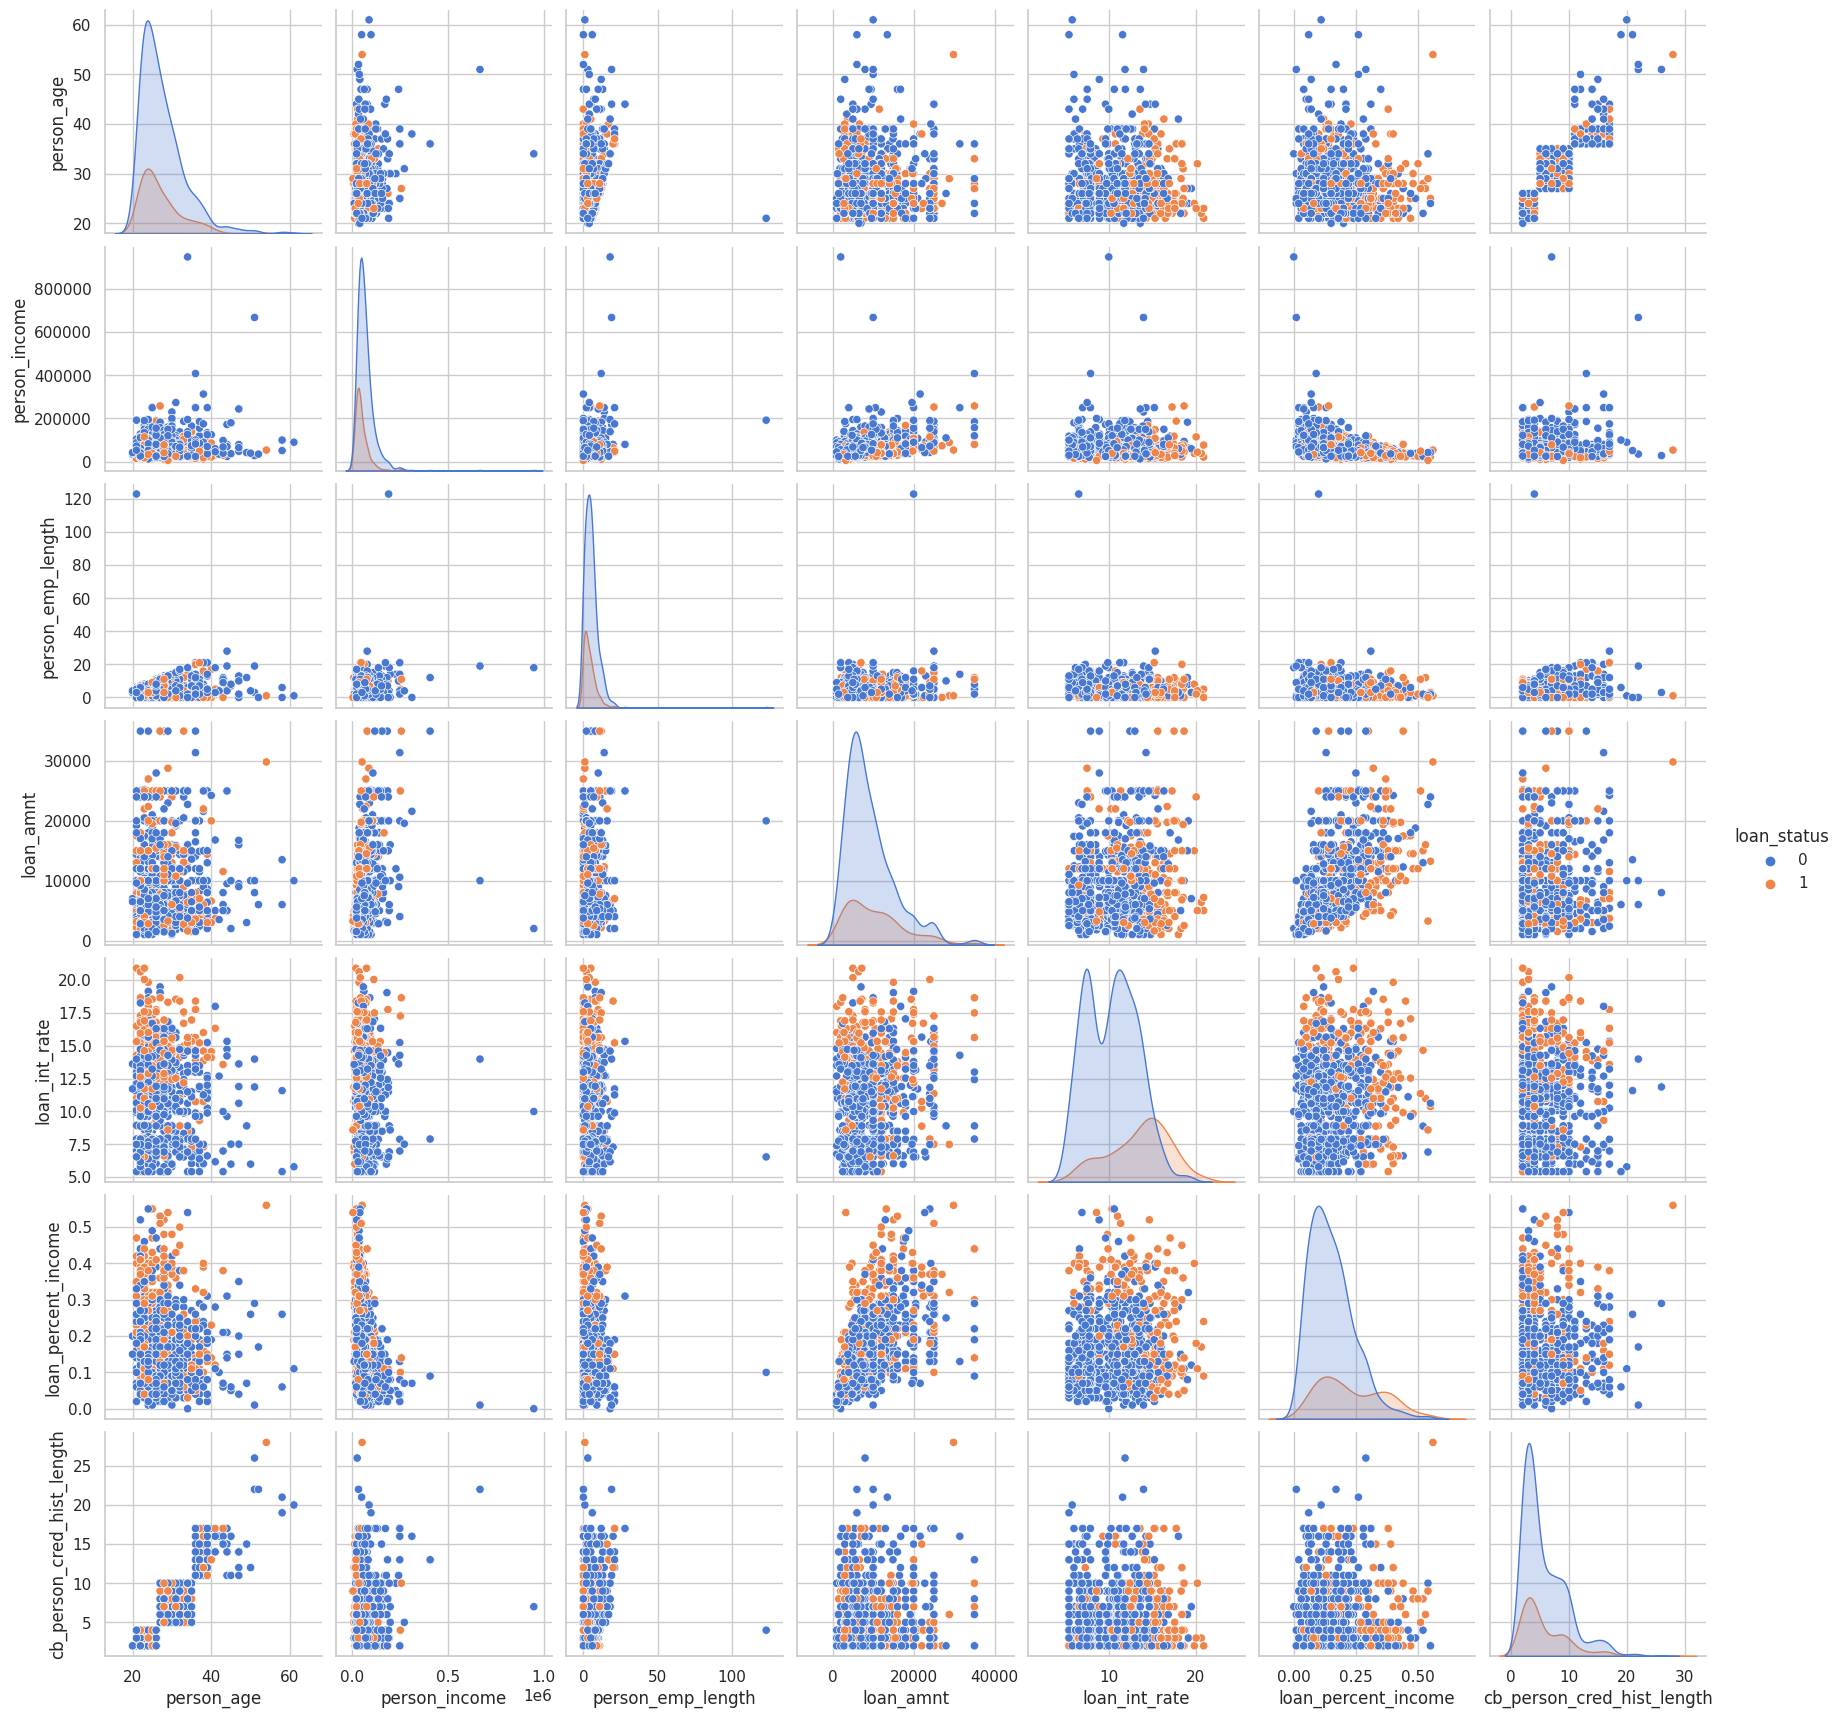

In [23]:
# Set the default Seaborn color palette
sns.set(style="whitegrid", palette="muted")

# Create a pair plot with the default color
sns.pairplot(df.sample(n=1000, random_state=42), hue="loan_status")

*   There is a non-linear relationship between 'loan_percent_income' and 'person_income'. The smaller the income the more likely it is that the percentage of income will be higher, the inverse is true for higher income that are more likely to have lower percentage of income. **'Default' is more likely to hapen for applicant with low income and high loan percentage income.**
*   There is a strange looking relationship between 'person_age' and 'cb_person_cre_hist_legth'. **The older the applicant the higher the credit history length.**
*   Looking at the distribution graph we can see that and 'loan_percent_income' and 'loan_int_rate' seem to be good indicater for default as there is a lack of overlap beteen the two curves.

# **Data Preparation/Cleaning**

# Duplicate data

In [24]:
# Look for duplicated rows in the dataset
dups = df.duplicated()
dups.value_counts()

False    32416
True       165
dtype: int64

There are 165 rows that are duplicates (0.5%).

In [25]:
# Deleting duplicate rows
df.drop_duplicates(inplace=True)

# Outliers

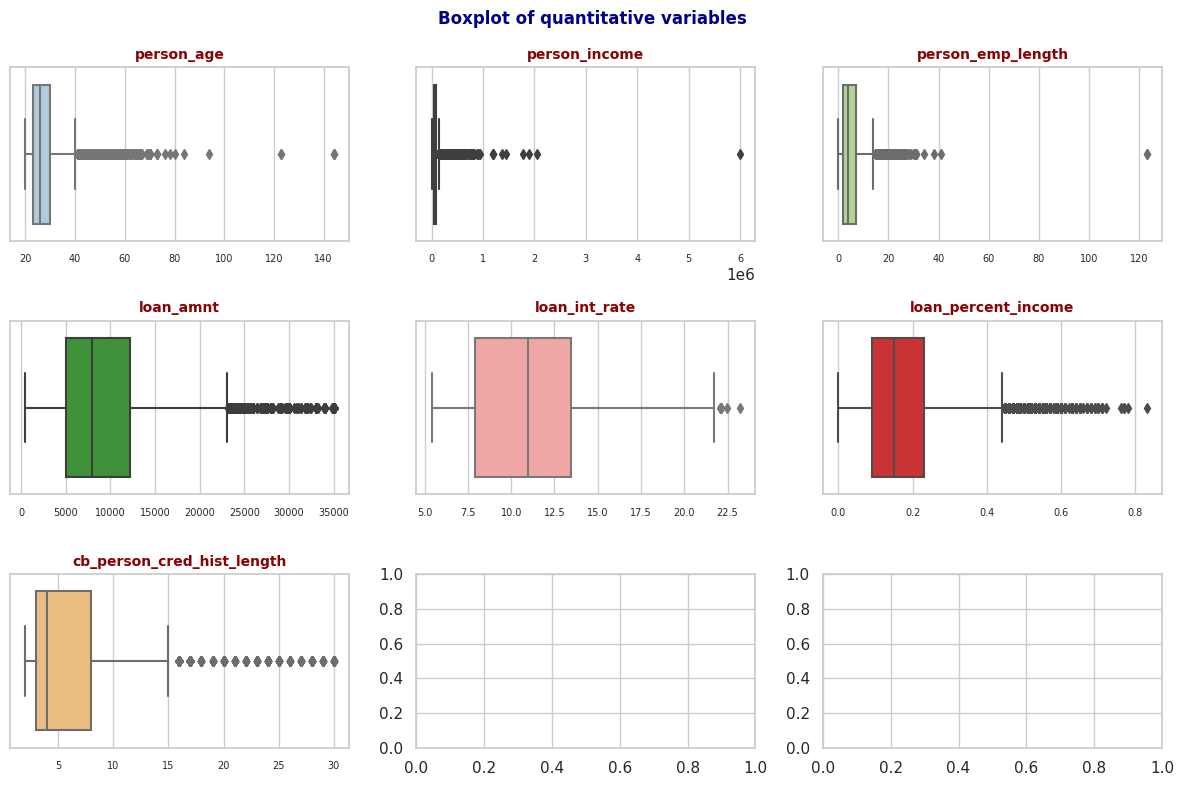

In [26]:
# Create Boxplot of numerical variables
sns.set_palette("Paired")
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flat

for i, col in enumerate(num_cols):
    sns.boxplot(x=col, data=df, color=sns.color_palette("Paired")[i], ax=axes[i])

    axes[i].set_xlabel("")
    axes[i].set_title(f"{col}", fontsize=10, fontweight="bold", color="darkred")
    axes[i].tick_params(labelsize=7)

fig.suptitle("Boxplot of quantitative variables", fontsize=12, fontweight="bold", color="darkblue")
fig.tight_layout()
fig.show()

*   The 3 variables with very noticable outliers are person_age, person_income and person_emp_length.
*   We will explore those variables in more details.

**Age:**

Using domain knowledge.

Typically the upper limit for the age of a loan applicant is between 70 and 95yo.

We can see on the box plot that there are some outliers values above this threashold.

In [27]:
# Count the number of rows with age greater than 95
count_of_outliers = df[df['person_age'] > 95].shape[0]
print("Number of Rows with Age > 95:", count_of_outliers)

# List the values of 'person_age' greater than 95
outliers_list = df[df['person_age'] > 95]['person_age'].tolist()
print("List of Values with Age > 95:", outliers_list)

Number of Rows with Age > 95: 5
List of Values with Age > 95: [144, 144, 123, 123, 144]


There are 6 records with age > 95. Those age include, 144 and 123 years old which are unrealistic. Those records are deleted.

In [28]:
# Delete the rows with 'person_age' greater than 90 from the DataFrame
df.drop(df.loc[df['person_age'] >= 90].index, inplace=True)

**Applicant Income**

In [29]:
# Count the number of rows with age greater than 1000000
count_of_outliers = df[df['person_income'] > 1000000].shape[0]
print("Number of Rows with income > 1000000:", count_of_outliers)

# List the values of 'person_age' greater than 1000000
outliers_list = df[df['person_income'] > 1000000]['person_income'].tolist()
print("List of Values with income > 1000000:", outliers_list)

# Count the number of rows with age greater than 650000
count_of_outliers = df[df['person_income'] > 650000].shape[0]
print("Number of Rows with income > 650000:", count_of_outliers)

Number of Rows with income > 1000000: 8
List of Values with income > 1000000: [1200000, 1200000, 1200000, 2039784, 1362000, 1440000, 1782000, 1900000]
Number of Rows with income > 650000: 31


There are 8 strong outliers with income above 1 million, and 31 records of applicant with an income of over 650000. Such income is rare but is realistic therefore the records are kept.

**Employement Length**

Rarely more than 60.

In [30]:
# Count the number of rows with age greater than 60
count_of_outliers = df[df['person_emp_length'] > 60].shape[0]
print("Number of Rows with Age > 60:", count_of_outliers)

# List the values of 'person_age' greater than 60
outliers_list = df[df['person_emp_length'] > 60]['person_emp_length'].tolist()
print("List of Values with Age > 60:", outliers_list)

Number of Rows with Age > 60: 2
List of Values with Age > 60: [123.0, 123.0]


In [31]:
# Delete the rows with 'person_age' greater than 60 from the DataFrame
df.drop(df.loc[df['person_emp_length'] >= 60].index, inplace=True)

It is very unlikely for someone to be working more that 60 years. The two records with 123 years are totaly unrealistic, therefore they are deleted.

# Missing Values

Those are inaccesible, lost forever values as we have no way of knowing the real value if they ever had one.

The data point seems to be Missing completely at random.

In [32]:
print(df.isnull().sum(), '\n')
print('Pecentage of missing values for perons_emp_length: ',df['person_emp_length'].isnull().mean() * 100)
print('Pecentage of missing values for loan_int_rate: ',df['loan_int_rate'].isnull().mean() * 100)

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3093
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64 

Pecentage of missing values for perons_emp_length:  2.7369785238212785
Pecentage of missing values for loan_int_rate:  9.543939767958529


<Axes: >

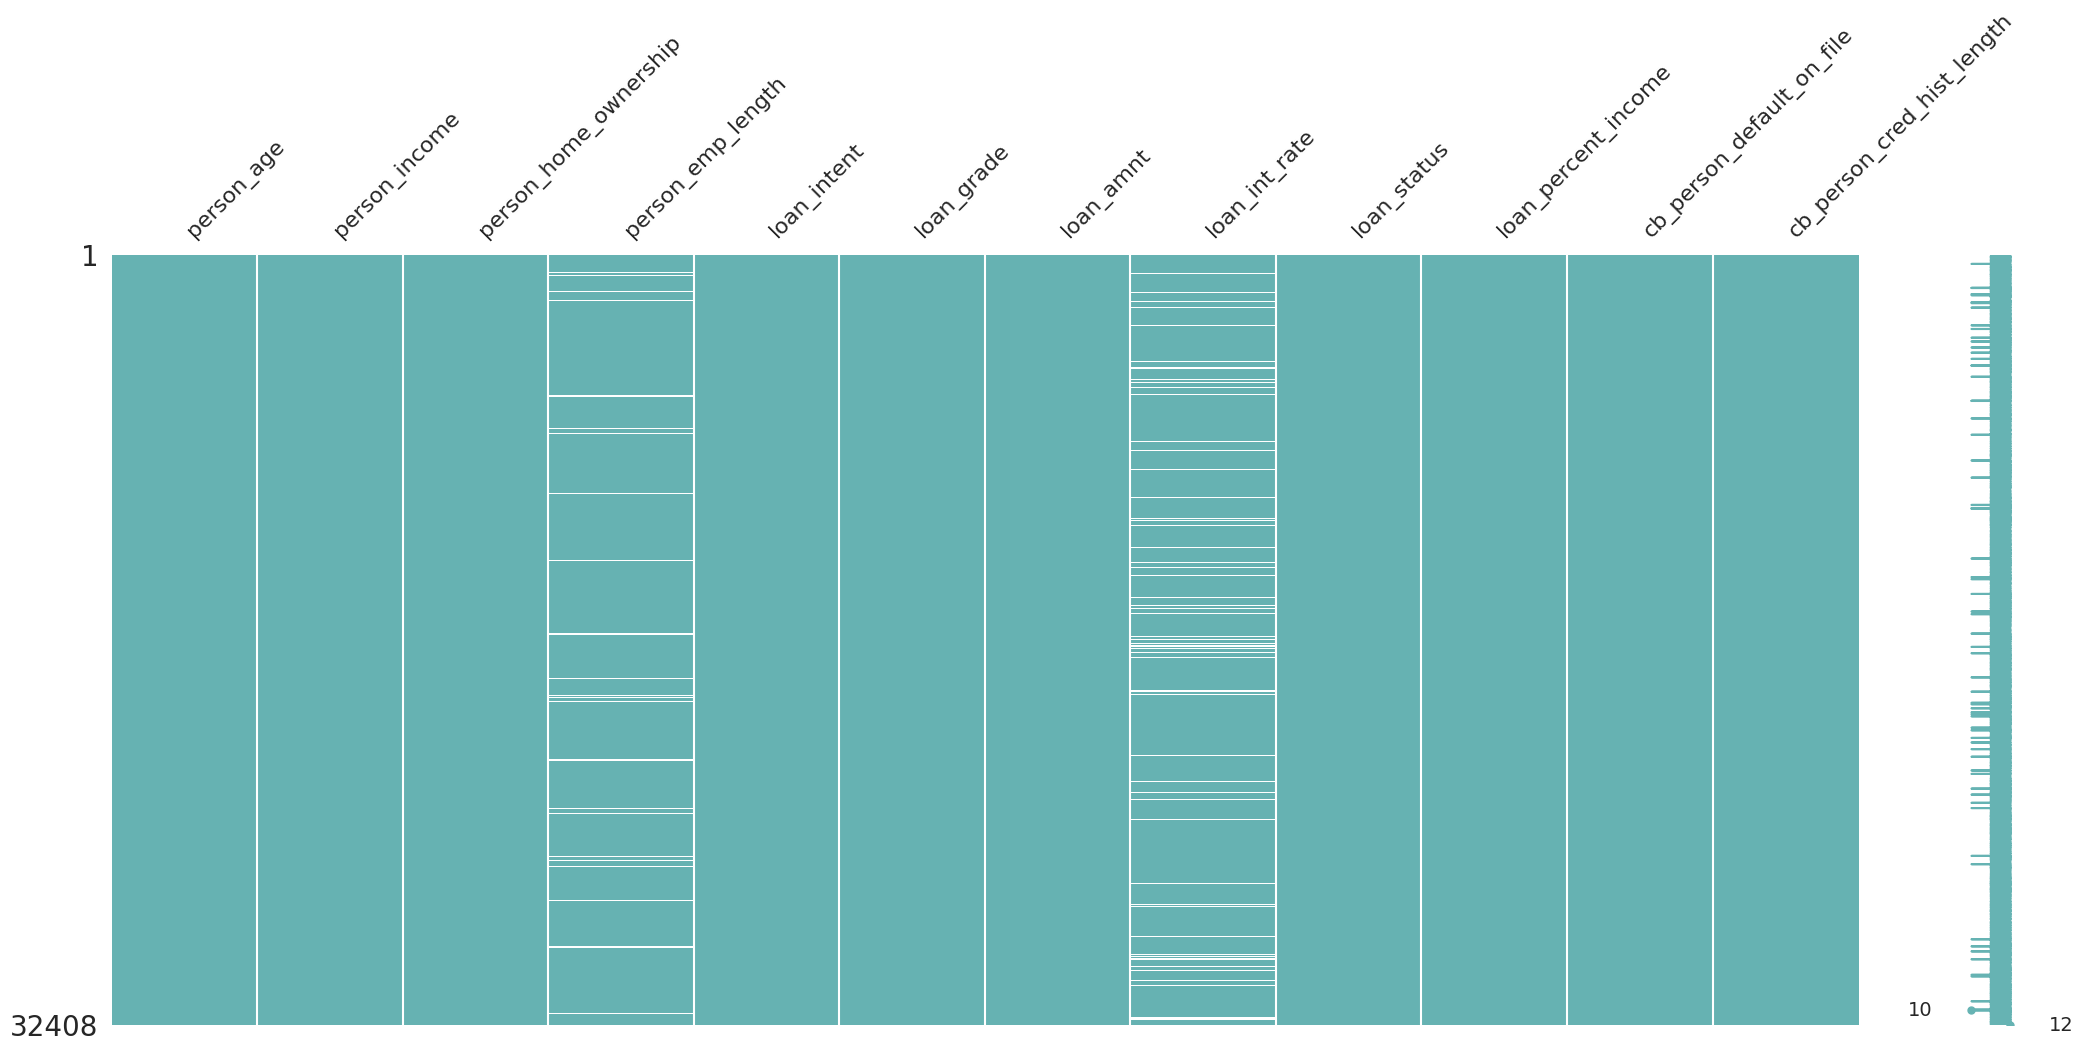

In [33]:
# Create missing value matrix using the missingno function
msno.matrix(df, color=[0.4,0.7,0.7])

*   'person_emp_length' has 887 missing values (2.7% of records) and 'loan_int_rate' has 3093 (9.5% of records). A total of 3980 missing values.
*   The matrix plot provides a colour fill for each column. When data is present, the plot is shaded , and when it is absent the plot is displayed in white. The missing data seems to appear at radnom througout the dataset.

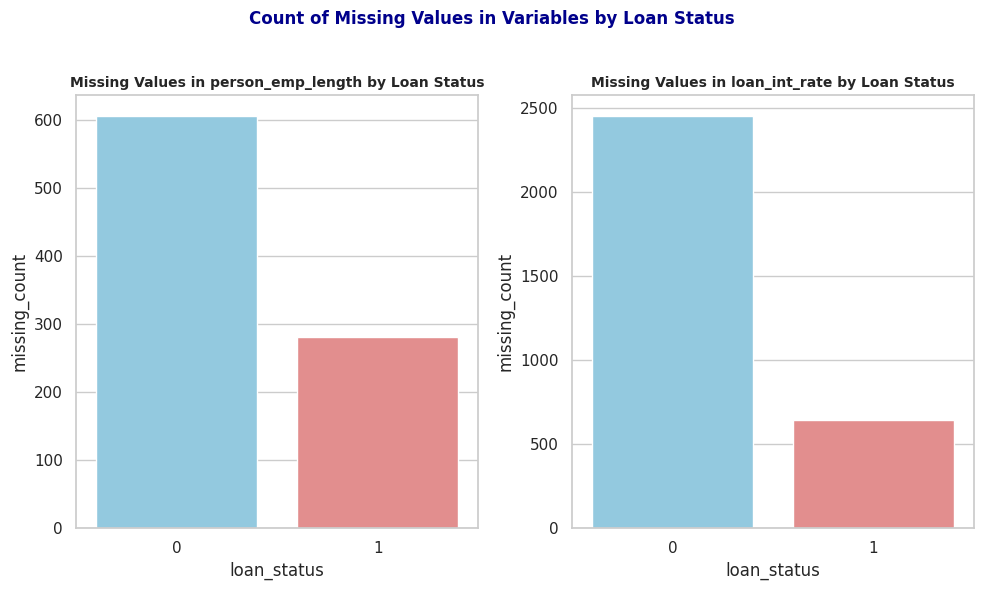

In [34]:
# Variables with missing values
miss_cols = ["person_emp_length", "loan_int_rate"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
axes = axes.flat

for i, col in enumerate(miss_cols):
    missing_values = df.groupby(["loan_status"])[col].apply(lambda x: x.isnull().sum()).reset_index(name='missing_count')

    # Plot bar chart for missing values
    sns.barplot(x='loan_status', y='missing_count', data=missing_values, palette=['skyblue', 'lightcoral'], ax=axes[i])
    axes[i].set_title(f"Missing Values in {col} by Loan Status", fontsize=10, fontweight="bold")

fig.suptitle("Count of Missing Values in Variables by Loan Status", fontsize=12, fontweight="bold", color="darkblue")
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

The majority of cases affected by missing values come from 'Default' records.

# Imputer Comparison

In [35]:
# Create a copy of the dataset
df_copy = df.copy()
# Encode for 'person_home_ownership'
home_mapping = {'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'OTHER': 3}
df_copy['person_home_ownership'] = df_copy['person_home_ownership'].replace(home_mapping)
# Encode for 'loan_intent'
purpose_mapping = {'PERSONAL': 0, 'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE': 3, 'HOMEIMPROVEMENT': 4, 'DEBTCONSOLIDATION': 5}
df_copy['loan_intent'] = df_copy['loan_intent'].replace(purpose_mapping)
# Encode for 'loan_grade'
grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
df_copy['loan_grade'] = df_copy['loan_grade'].replace(grade_mapping)
# Encode for 'cb_person_default_on_file'
default_mapping = {'Y': 0, 'N': 1}
df_copy['cb_person_default_on_file'] = data['cb_person_default_on_file'].replace(default_mapping)

# List of numerical column
cols_to_norm = ['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']
# Define Scaler
scal = StandardScaler()
# Scaling numerical variables
df_copy[cols_to_norm] = scal.fit_transform(df_copy[cols_to_norm])

# Split the datset X independent variables and y dependent variable (target)
X = df_copy.drop('loan_status', axis=1)
y = df_copy['loan_status']

## IterativeImputer

In [36]:
# Evaluate IterativeImputer
results = list()
strategies = [str(i) for i in range(1, 10)]
for s in strategies:
  # create the modeling pipeline
  pipeline_iterative = Pipeline(steps=[('i', IterativeImputer(max_iter=int(s))), ('m',
  RandomForestClassifier())])
  # evaluate the model
  cv_iterative = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores_iterative = cross_val_score(pipeline_iterative, X, y, scoring='recall', cv=cv_iterative, n_jobs=-1)
  # store results
  results.append(scores)
  print('>%s %.3f (%.3f)' % (s, mean(scores_iterative), std(scores_iterative)))

>1 0.714 (0.020)
>2 0.716 (0.019)
>3 0.715 (0.020)
>4 0.714 (0.019)
>5 0.715 (0.020)
>6 0.714 (0.020)
>7 0.715 (0.020)
>8 0.714 (0.020)
>9 0.715 (0.020)


In [37]:
# define imputer
imputer_iterative = IterativeImputer(imputation_order='ascending', max_iter=100)
# Fit and Transform
imputed_iterative = imputer_iterative.fit_transform(X)
df_imputed_iterative = pd.DataFrame(imputed_iterative, columns=X.columns)

In [38]:
# Merge Imputed dataset with target variable
df_imputed_iterative.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
df_iterative = df_imputed_iterative.join(y)

In [39]:
df_iterative.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [40]:
# Reverse mapping for 'person_home_ownership'
reverse_home_mapping = {0: 'RENT', 1: 'OWN', 2: 'MORTGAGE', 3: 'OTHER'}
df_iterative['person_home_ownership'] = df_iterative['person_home_ownership'].replace(reverse_home_mapping)

# Reverse mapping for 'loan_intent'
reverse_purpose_mapping = {0: 'PERSONAL', 1: 'EDUCATION', 2: 'MEDICAL', 3: 'VENTURE', 4: 'HOMEIMPROVEMENT', 5: 'DEBTCONSOLIDATION'}
df_iterative['loan_intent'] = df_iterative['loan_intent'].replace(reverse_purpose_mapping)

# Reverse mapping for 'loan_grade'
reverse_grade_mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G'}
df_iterative['loan_grade'] = df_iterative['loan_grade'].replace(reverse_grade_mapping)

# Reverse mapping for 'cb_person_default_on_file'
reverse_repaid_mapping = {0: 'Y', 1: 'N'}
df_iterative['cb_person_default_on_file'] = df_iterative['cb_person_default_on_file'].replace(reverse_repaid_mapping)

# Reverse Scaling
df_iterative[cols_to_norm] = scal.inverse_transform(df_iterative[cols_to_norm])

In [41]:
# Extract the two columns from each dataframe
column1_df1 = df_iterative['person_emp_length']
column2_df1 = df_iterative['loan_int_rate']

column1_df2 = df['person_emp_length']
column2_df2 = df['loan_int_rate']

# Describe for each column in each dataframe
describe_df1 = pd.DataFrame({
    'person_emp_length': column1_df1.describe(),
    'loan_int_rate': column2_df1.describe()
}, index=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

describe_df2 = pd.DataFrame({
    'person_emp_length': column1_df2.describe(),
    'loan_int_rate': column2_df2.describe()
}, index=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

# Print or display the comparison dataframes
print("Describe Statistics for clean_df:")
print(describe_df1)

print("\nDescribe Statistics for df:")
print(describe_df2)

Describe Statistics for clean_df:
       person_emp_length  loan_int_rate
count          32408.000      32408.000
mean               4.776         11.013
std                3.987          3.215
min                0.000          5.420
25%                2.000          7.900
50%                4.000         10.990
75%                7.000         13.230
max               41.000         23.373

Describe Statistics for df:
       person_emp_length  loan_int_rate
count          31521.000      29315.000
mean               4.783         11.017
std                4.037          3.242
min                0.000          5.420
25%                2.000          7.900
50%                4.000         10.990
75%                7.000         13.470
max               41.000         23.220


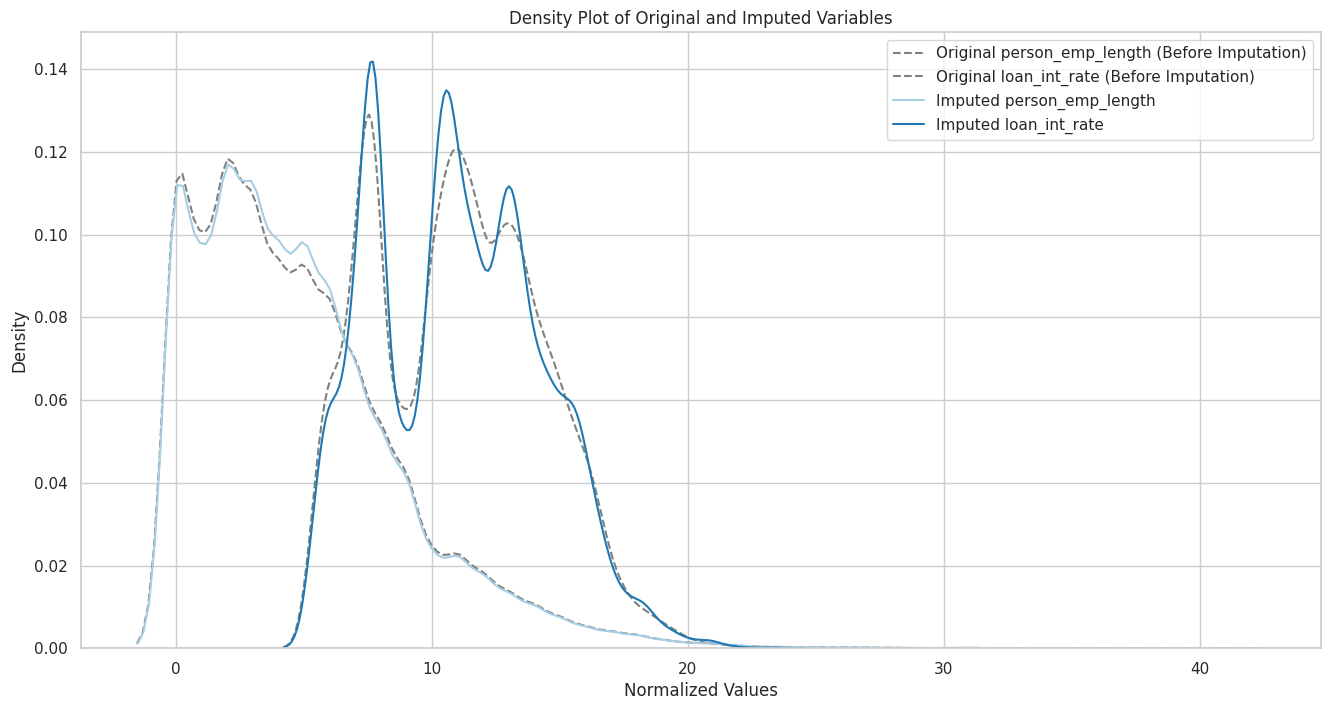

In [42]:
fig, ax = plt.subplots(figsize=(16, 8))

# Imputed columns
imputed_cols = ['person_emp_length', 'loan_int_rate']

# Plot density plots for each orginal variable
for col in imputed_cols:
    sns.kdeplot(df[col].dropna(), label=f'Original {col} (Before Imputation)', linestyle='--', color='gray')

# Plot density plots for each imputed variable
for col in imputed_cols:
    sns.kdeplot(df_iterative[col], label=f'Imputed {col}')

# Set plot title and labels
plt.title('Density Plot of Original and Imputed Variables')
plt.xlabel('Normalized Values')
plt.ylabel('Density')

# Show legend
plt.legend()

# Show the plot
plt.show()

*   Comparing the dentisity for both variable show that the imputed values did not change the distribution of person_emp_length but much.
*   There are slight changes to the loan_int_rate distribution, displaying higher highs after imputation but overall staying close to the original.
*   Looking at the mean and variance shows there hasnt beend a lost of changes between the original distribution and the imputed one.

## KNNImputer

>1 0.715 (0.020)
>3 0.715 (0.019)
>5 0.714 (0.020)
>7 0.715 (0.019)
>9 0.715 (0.019)
>15 0.714 (0.019)
>18 0.714 (0.019)
>21 0.715 (0.019)


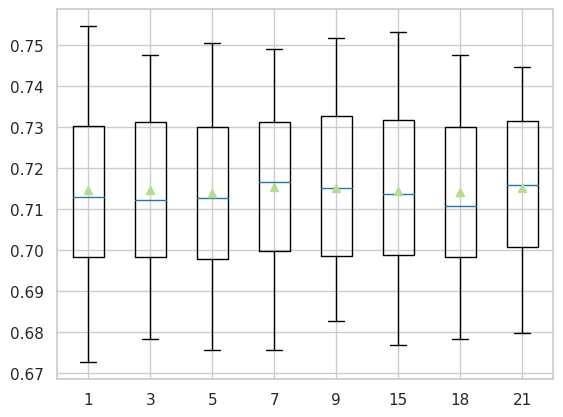

In [51]:
# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
for s in strategies:
  # create the modeling pipeline
  pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
  # evaluate the model
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X, y, scoring='recall', cv=cv, n_jobs=-1)
  # store results
  results.append(scores)
  print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))


In [44]:
# Define KNNImputer
Kimputer = KNNImputer(n_neighbors=3, weights="uniform")
# Fit and Transform the X dataset
Kimputed = Kimputer.fit_transform(X)

In [45]:
# Turn into datset
df_Kimputed = pd.DataFrame(Kimputed, columns=X.columns)

In [46]:
# Merge new imputed datset and the y dataset
df_Kimputed.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
K_clean_df = df_Kimputed.join(y)

In [47]:
K_clean_df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [48]:
# Reverse mapping for 'person_home_ownership'
reverse_home_mapping = {0: 'RENT', 1: 'OWN', 2: 'MORTGAGE', 3: 'OTHER'}
K_clean_df['person_home_ownership'] = K_clean_df['person_home_ownership'].replace(reverse_home_mapping)

# Reverse mapping for 'loan_intent'
reverse_purpose_mapping = {0: 'PERSONAL', 1: 'EDUCATION', 2: 'MEDICAL', 3: 'VENTURE', 4: 'HOMEIMPROVEMENT', 5: 'DEBTCONSOLIDATION'}
K_clean_df['loan_intent'] = K_clean_df['loan_intent'].replace(reverse_purpose_mapping)

# Reverse mapping for 'loan_grade'
reverse_grade_mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G'}
K_clean_df['loan_grade'] = K_clean_df['loan_grade'].replace(reverse_grade_mapping)

# Reverse mapping for 'cb_person_default_on_file'
reverse_repaid_mapping = {0: 'Y', 1: 'N'}
K_clean_df['cb_person_default_on_file'] = K_clean_df['cb_person_default_on_file'].replace(reverse_repaid_mapping)

# Reverse Scaling
K_clean_df[cols_to_norm] = scal.inverse_transform(K_clean_df[cols_to_norm])

In [49]:
# Extract the two columns from each dataframe
column1_df1 = K_clean_df['person_emp_length']
column2_df1 = K_clean_df['loan_int_rate']

column1_df2 = df['person_emp_length']
column2_df2 = df['loan_int_rate']

# Describe for each column in each dataframe
describe_df1 = pd.DataFrame({
    'person_emp_length': column1_df1.describe(),
    'loan_int_rate': column2_df1.describe()
}, index=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

describe_df2 = pd.DataFrame({
    'person_emp_length': column1_df2.describe(),
    'loan_int_rate': column2_df2.describe()
}, index=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

# Print or display the comparison dataframes
print("Describe Statistics for clean_df:")
print(describe_df1)

print("\nDescribe Statistics for df:")
print(describe_df2)

Describe Statistics for clean_df:
       person_emp_length  loan_int_rate
count          32408.000      32408.000
mean               4.777         11.009
std                4.001          3.218
min                0.000          5.420
25%                2.000          7.900
50%                4.000         10.990
75%                7.000         13.470
max               41.000         23.220

Describe Statistics for df:
       person_emp_length  loan_int_rate
count          31521.000      29315.000
mean               4.783         11.017
std                4.037          3.242
min                0.000          5.420
25%                2.000          7.900
50%                4.000         10.990
75%                7.000         13.470
max               41.000         23.220


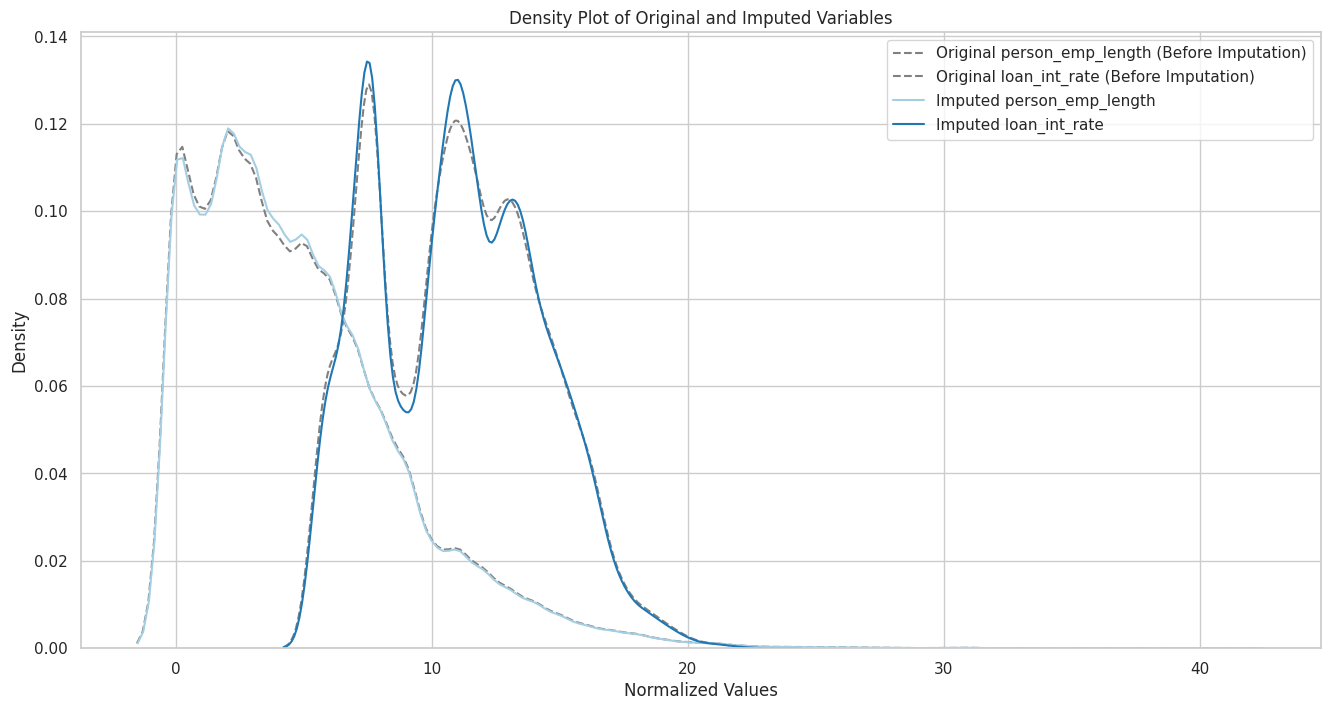

In [50]:
fig, ax = plt.subplots(figsize=(16, 8))

# Imputed columns
imputed_cols = ['person_emp_length', 'loan_int_rate']

# Plot density plots for each orginal variable
for col in imputed_cols:
    sns.kdeplot(df[col].dropna(), label=f'Original {col} (Before Imputation)', linestyle='--', color='gray')

# Plot density plots for each imputed variable
for col in imputed_cols:
    sns.kdeplot(K_clean_df[col], label=f'Imputed {col}')

# Set plot title and labels
plt.title('Density Plot of Original and Imputed Variables')
plt.xlabel('Normalized Values')
plt.ylabel('Density')

# Show legend
plt.legend()

# Show the plot
plt.show()



*   Both Imputer display similar results both in model accuracy and variance measure (mean, std)
*   The KNN Imputer exhibit a more fiting density plot therefore, it is selected to go forward.



# **Export**

In [52]:
#Export cleaned dataset to Google Drive
K_clean_df.to_csv('clean_data.csv')
K_clean_df.to_csv('/content/drive/MyDrive/Colab Notebooks/clean_data.csv')